In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_style('dark')

ba = 'SWPP'
file = f"{ba}.csv"
diri = "data"

path = os.path.join(diri, file)

path

'data\\SWPP.csv'

In [3]:
df = pd.read_csv(path)
df = df.drop(['raw demand (MW)', 'category', 'forecast demand (MW)'], axis=1)

df["date_time"] = pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S')
df["date"] = df["date_time"].dt.date  # Add separate date string 
df["hour"] = df["date_time"].dt.hour  # Add separate hour string

df

,date_time,cleaned demand (MW),date,hour
0,2015-07-02 00:00:00,39918,2015-07-02,0
1,2015-07-02 01:00:00,38696,2015-07-02,1
2,2015-07-02 02:00:00,37245,2015-07-02,2
3,2015-07-02 03:00:00,36321,2015-07-02,3
4,2015-07-02 04:00:00,34084,2015-07-02,4
...,...,...,...,...
43843,2020-07-01 19:00:00,43462,2020-07-01,19
43844,2020-07-01 20:00:00,44780,2020-07-01,20
43845,2020-07-01 21:00:00,45884,2020-07-01,21
43846,2020-07-01 22:00:00,45970,2020-07-01,22


In [4]:
df_demand = df.pivot(index = "date", columns = "hour", values = "cleaned demand (MW)").copy()
df_demand

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2015-07-02,39918,38696,37245,36321,34084,31400,29231,27588,26475,25734,...,29550,30914,32262,33460,34506,35392,35700,35924,35857,35173
2015-07-03,34183,33056,32028,31239,29540,27443,25607,24347,23531,22982,...,25348,27052,28623,30127,31500,32735,33544,34276,34711,34536
2015-07-04,33621,32372,30929,30108,28531,26750,24978,23577,22605,22039,...,23550,25600,27701,29587,31153,32376,33303,33999,34146,33748
2015-07-05,32812,31523,29984,28840,27697,26707,25312,24017,23042,22437,...,24521,26830,29143,31227,33224,34951,36353,37428,38186,38428
2015-07-06,37835,36563,35184,34516,32508,30043,28090,26756,25827,25268,...,29917,31798,33792,35473,36914,38170,38739,38938,38485,37233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,42505,41224,39479,38369,36490,34460,32066,30393,29075,27959,...,28952,30619,32575,34442,35972,37347,38517,39569,40408,40839
2020-06-28,40611,39436,37843,36856,35159,33086,31124,29684,28640,27901,...,29270,31580,34015,36206,38153,39680,40692,41361,41725,41735
2020-06-29,41041,40008,38767,38025,36314,33980,32038,30703,29689,29083,...,34115,35847,37726,39384,40897,42205,43198,44049,44614,44616


,Peak Demand (MW)
date,
2015-07-02,39918
2015-07-03,34711
2015-07-04,34146
2015-07-05,38428
2015-07-06,38938
...,...
2020-06-27,42505
2020-06-28,41735
2020-06-29,44616


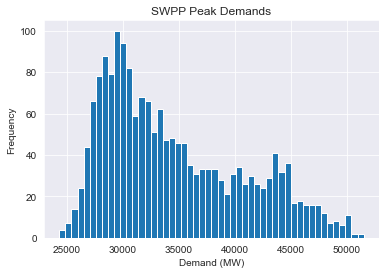

In [5]:
peaks = df_demand.max(axis=1).to_frame(name='Peak Demand (MW)')
peaks.hist(bins=50)
plt.xlabel("Demand (MW)")
plt.ylabel("Frequency")
plt.title(f'{ba} Peak Demands')

peaks


In [6]:
if not os.path.exists(f'daily_peaks'):
    os.mkdir(f'daily_peaks')

peaks_path = os.path.join('daily_peaks', ba + ".csv")

peaks.to_csv(peaks_path)

In [14]:
for date, row in peaks.iterrows():
    print(row['Peak Demand (MW)'])

39918
34711
34146
38428
38938
35807
30452
33477
35979
38761
41226
44927
44592
43634
44024
44146
42468
41651
43379
41594
40226
43516
45740
44242
42942
44985
45579
44244
41594
41271
39557
40261
41706
40556
39897
42194
44773
43179
41762
41975
41286
40539
41565
40694
39696
39391
39606
38453
36338
32837
35178
36250
35486
35202
36915
39073
38014
35094
34030
36092
40938
41289
42010
42437
42060
40102
40574
39339
37837
36889
38676
36841
29414
29599
34062
35558
39021
39630
37767
32024
26733
32646
35360
33506
33086
33662
31441
30812
34288
32737
30250
29993
29235
26913
25735
27359
30105
31564
33382
32211
27653
32181
32645
31470
32807
33132
31536
27134
25677
29054
30612
31328
30960
29688
28278
25237
27182
28029
28246
28219
28023
27460
24794
27528
28658
28744
28977
29058
27402
26295
28204
28612
28537
28930
29058
27457
26291
27881
28868
29284
29499
29690
28975
29758
29728
30187
29215
28508
29476
30824
30462
30626
32128
32577
33420
32572
29714
28401
31786
30694
30170
29282
29283
28579
27896
30605
3095